# UNFINISHED


# Titanic dataset

Plan of analysing the data

Goal: Find out the features of a typical person that survived or did not survive the sinking of Titanic.

Actions:
1. Check in total how many survivors were in the titanic
2. Check what was a sex of survivals
3. Check avarage age of survivals
4. Check from where they were in Titanic (embark_town)
5. Check if more survivals were alone or not
6. Check if more survivals were adult or not
7. Check amount of sublings
7. Check what was the most popular "pclass" of survivals

--> Make a description of person who has more possibilities to survive on the Titanic

In [41]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# download dataset
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
# Check in total how many survivors were in the titanic
df[df['survived'] == 1].count()

# we can see that in total we have 342 survivals
# this is 38% of the total passengers

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [43]:
# Check what was a sex of survivals
female_surv = df[(df['survived'] == 1) & (df['sex'] == "female")]
female_surv

# we have just 109 man survivals and 233 female
# it means, that women had almost double chances to survive
# I think, it is because man tried to save their woman
# they gave them places in lifeboats
# woman were in priority

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False


In [44]:
# Check avarage age of survivals
mean_age = female_surv['age'].mean()
mean_age

# average age was about 29

28.84771573604061

In [45]:
# Check from where they were in Titanic (embark_town)
popular_towns = female_surv['embark_town'].value_counts()
popular_towns.head()

# we can see that more survivals from Southampton
# Why? I though it is just random but I googled...
# Titanic left Southampton (the main port) on April 10
# Of the 908 crew members aboard Titanic, 724 were from Southampton

Southampton    140
Cherbourg       64
Queenstown      27
Name: embark_town, dtype: int64

<AxesSubplot: xlabel='alone', ylabel='survived'>

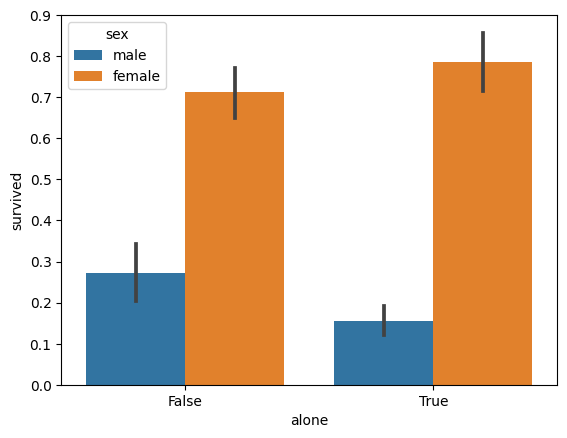

In [59]:
# let's see do we have any correlation between a man, his "alone" status 
# and his chance to survive
sns.barplot(x='alone', y='survived', data=df, hue="sex")

# we can see that female were almost 50/50 alone and with someone
# it did not affect a lot on their chance to survive

# but for man who were not alone it was almost in 1.5 more chances to survive

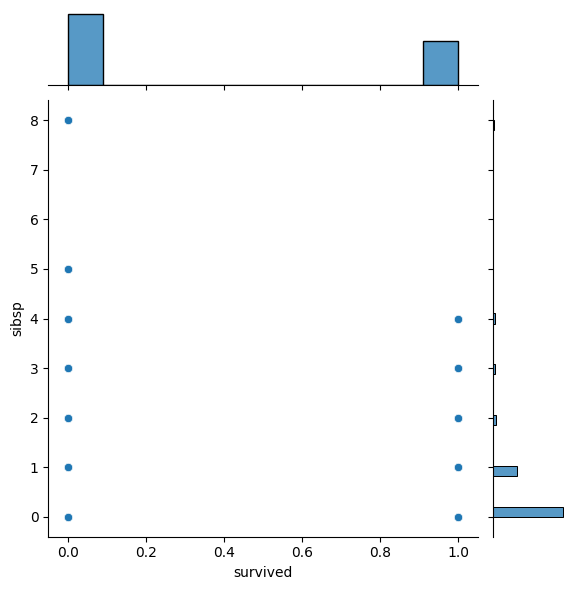

In [66]:
# I decided to check if there is any correlation
# between amount of sublings and survivals
sns.jointplot(x='survived', y='sibsp', data=df)

# we can see that there is no correlation

<AxesSubplot: xlabel='survived', ylabel='parch'>

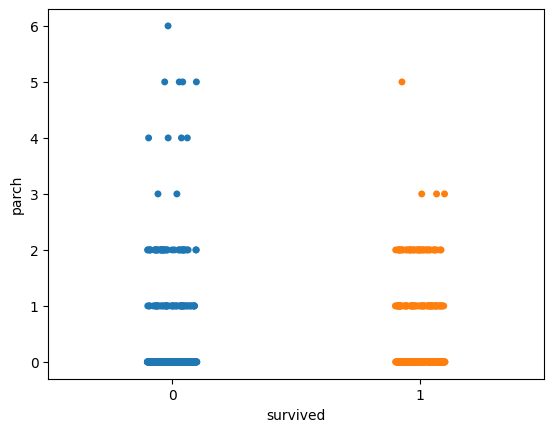

In [69]:
# I decided to check if there is any correlation
# between amount of parents/children and survivals
#sns.jointplot(x='survived', y='parch', data=df)

sns.stripplot(x='survived', y='parch', data=df)

<AxesSubplot: xlabel='class', ylabel='survived'>

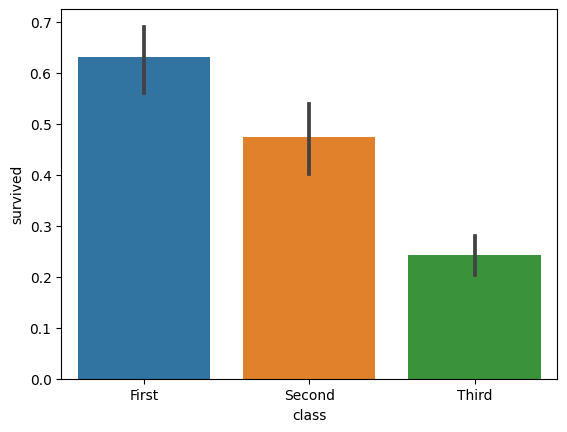

In [62]:
# Check what was the most popular "pclass" of survivals
sns.barplot(x='class', y='survived', data=df)

# we can that people from 1 and 2 class had more chances to survive
# it could be that they were in priority for lifeboats